# Try PyGMT on Google Colab

This Jupyter Notebook shows how to install and use PyGMT on Google Colab.

**NOTE:** Any changes will be lost when the Jupyter lab is closed. Select "File"->"Download" to save notebooks to your computer.

To execute the code cells, select it and type `Shift + Enter` or click on the "Run" ► button in the menu bar.

For tutorials and more examples, visit the official website: https://www.pygmt.org

## Install PyGMT and its dependencies on Google Colab

**Google Colab** doesn't have PyGMT and its dependencies installed. We need to follow the instructions below to install them.

First, we need to install conda on Google Colab. The installation process is greatly simplified using the [condacolab](https://github.com/conda-incubator/condacolab) package.

*After condacolab finishes the installation, it will restart the Python kernel for changes to be applied. This happens automatically. Thus, you will see a message saying "Your session crashed for an unknown reason". You can safely ignore this message!*

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


Now we can install PyGMT and its dependencies using a single command. The installation may take a few minutes:

In [1]:
!mamba install pygmt


Looking for: ['pygmt']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   6%
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  17%
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  40%
conda-forge/noarch     5%[+] 0.5s
conda-forge/linux-64  44%
conda-forge/noarch    23%[+] 0.6s
conda-forge/linux-64  52%
conda-forge/noarch    31%[+] 0.7s
conda-forge/linux-64  56%
conda-forge/noarch    40%[+] 0.8s
conda-forge/linux-64  60%
conda-forge/noarch    50%[+] 0.9s
conda-forge/linux-64  64%
conda-forge/noarch    68%[+] 1.0s
conda-forge/linux-64  68%
conda-forge/noarch    78%[+] 1.1s
conda-forge/linux-64  76%
conda-forge/noarch    87%conda-forge/noarch                                
[+] 1.2s
conda-forge/linux-64  80%[+] 1.3s
conda-forge/linux-64  92%conda-forge/linux-64                              

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/

## Loading the PyGMT package

You can load PyGMT by importing the `pygmt` Python package. Most GMT processing modules will be avialable as functions in this package. The plotting modules are methods of the `pygmt.Figure` class.

In [2]:
# Load the PyGMT package. This only needs to be run once
import pygmt

In [3]:
import matplotlib.pyplot as plt
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.2 MB/s eta 0:00:00


In [4]:
!pip install netCDF4

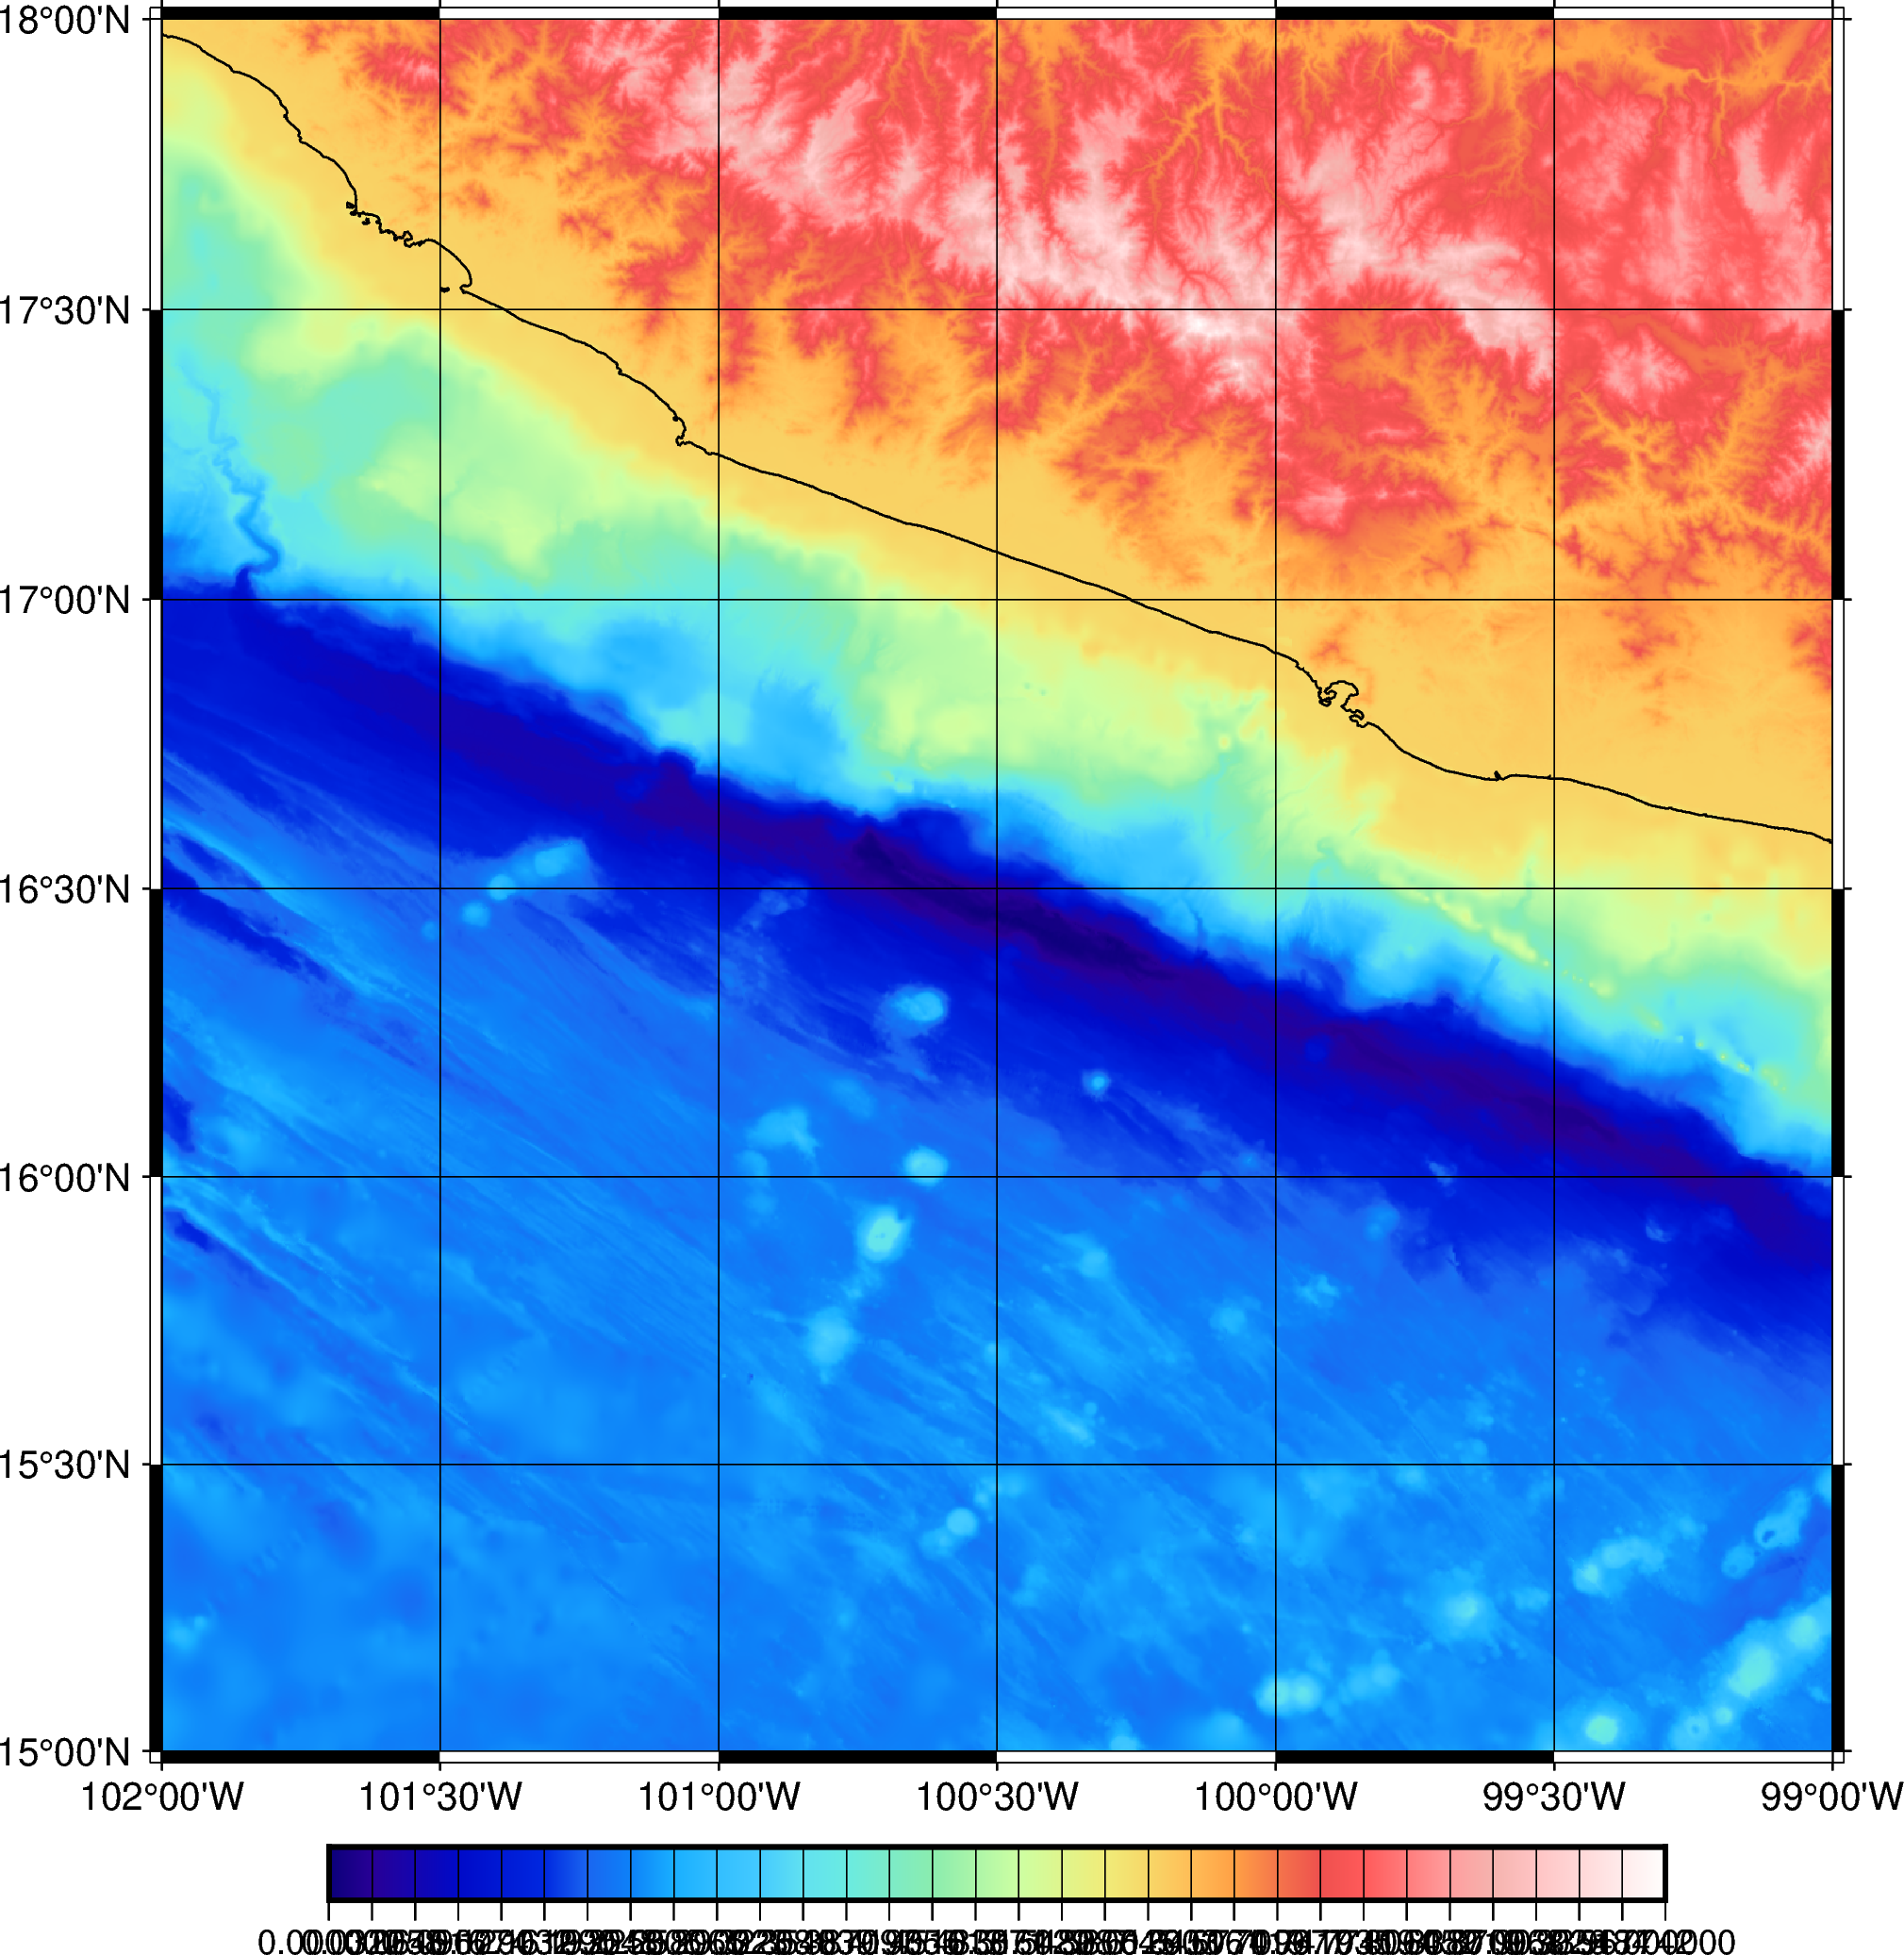

In [8]:
import pygmt
import geopandas as gpd

fig = pygmt.Figure()
# Set the x-range from 10E to 20E and the y-range to 35N to 45N
reg="-105/-96/15.5/20"
# Set projection to Mercator, and the figure size to 15 centimeters
proj="M15c"
fig.grdimage("/content/altitude.tif",
    region=reg,
    projection=proj,
    cmap="haxby"

    )
fig.coast(
    #region=reg,
    #projection=proj,
    #land="lightgrey",
    # Display the national borders and set the pen thickness to 0.5p
    borders="1/0.5p",
    # Display the shorelines and set the pen thickness to 0.5p
    shorelines="1/0.5p",
    # Set the frame to display annotations and gridlines
    frame="ag",
)
#agregar valores a la tabla de color
pygmt.makecpt(cmap="haxby")
fig.colorbar()
#output_file = "res_grav_soli.png"
#fig.savefig(output_file)
fig.show()



In [9]:
import numpy as np
import geopy.distance

Trench=np.loadtxt("./trench_cocos.csv",skiprows=1,delimiter=",")

Trench=Trench[ (Trench[:,0]>-102.4468)*(Trench[:,1]<17.1547),:]
Trench=Trench[ (Trench[:,0]<-97.3)*(Trench[:,1]>14.9981),:]


gdf = gpd.GeoDataFrame(Trench,
    geometry = gpd.points_from_xy(Trench[:,0], Trench[:,1]),
    crs = 'EPSG:4326')

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 at 30x30 arc seconds reduced by Gaussian Cartesian filtering (2.6 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_p): N15W105


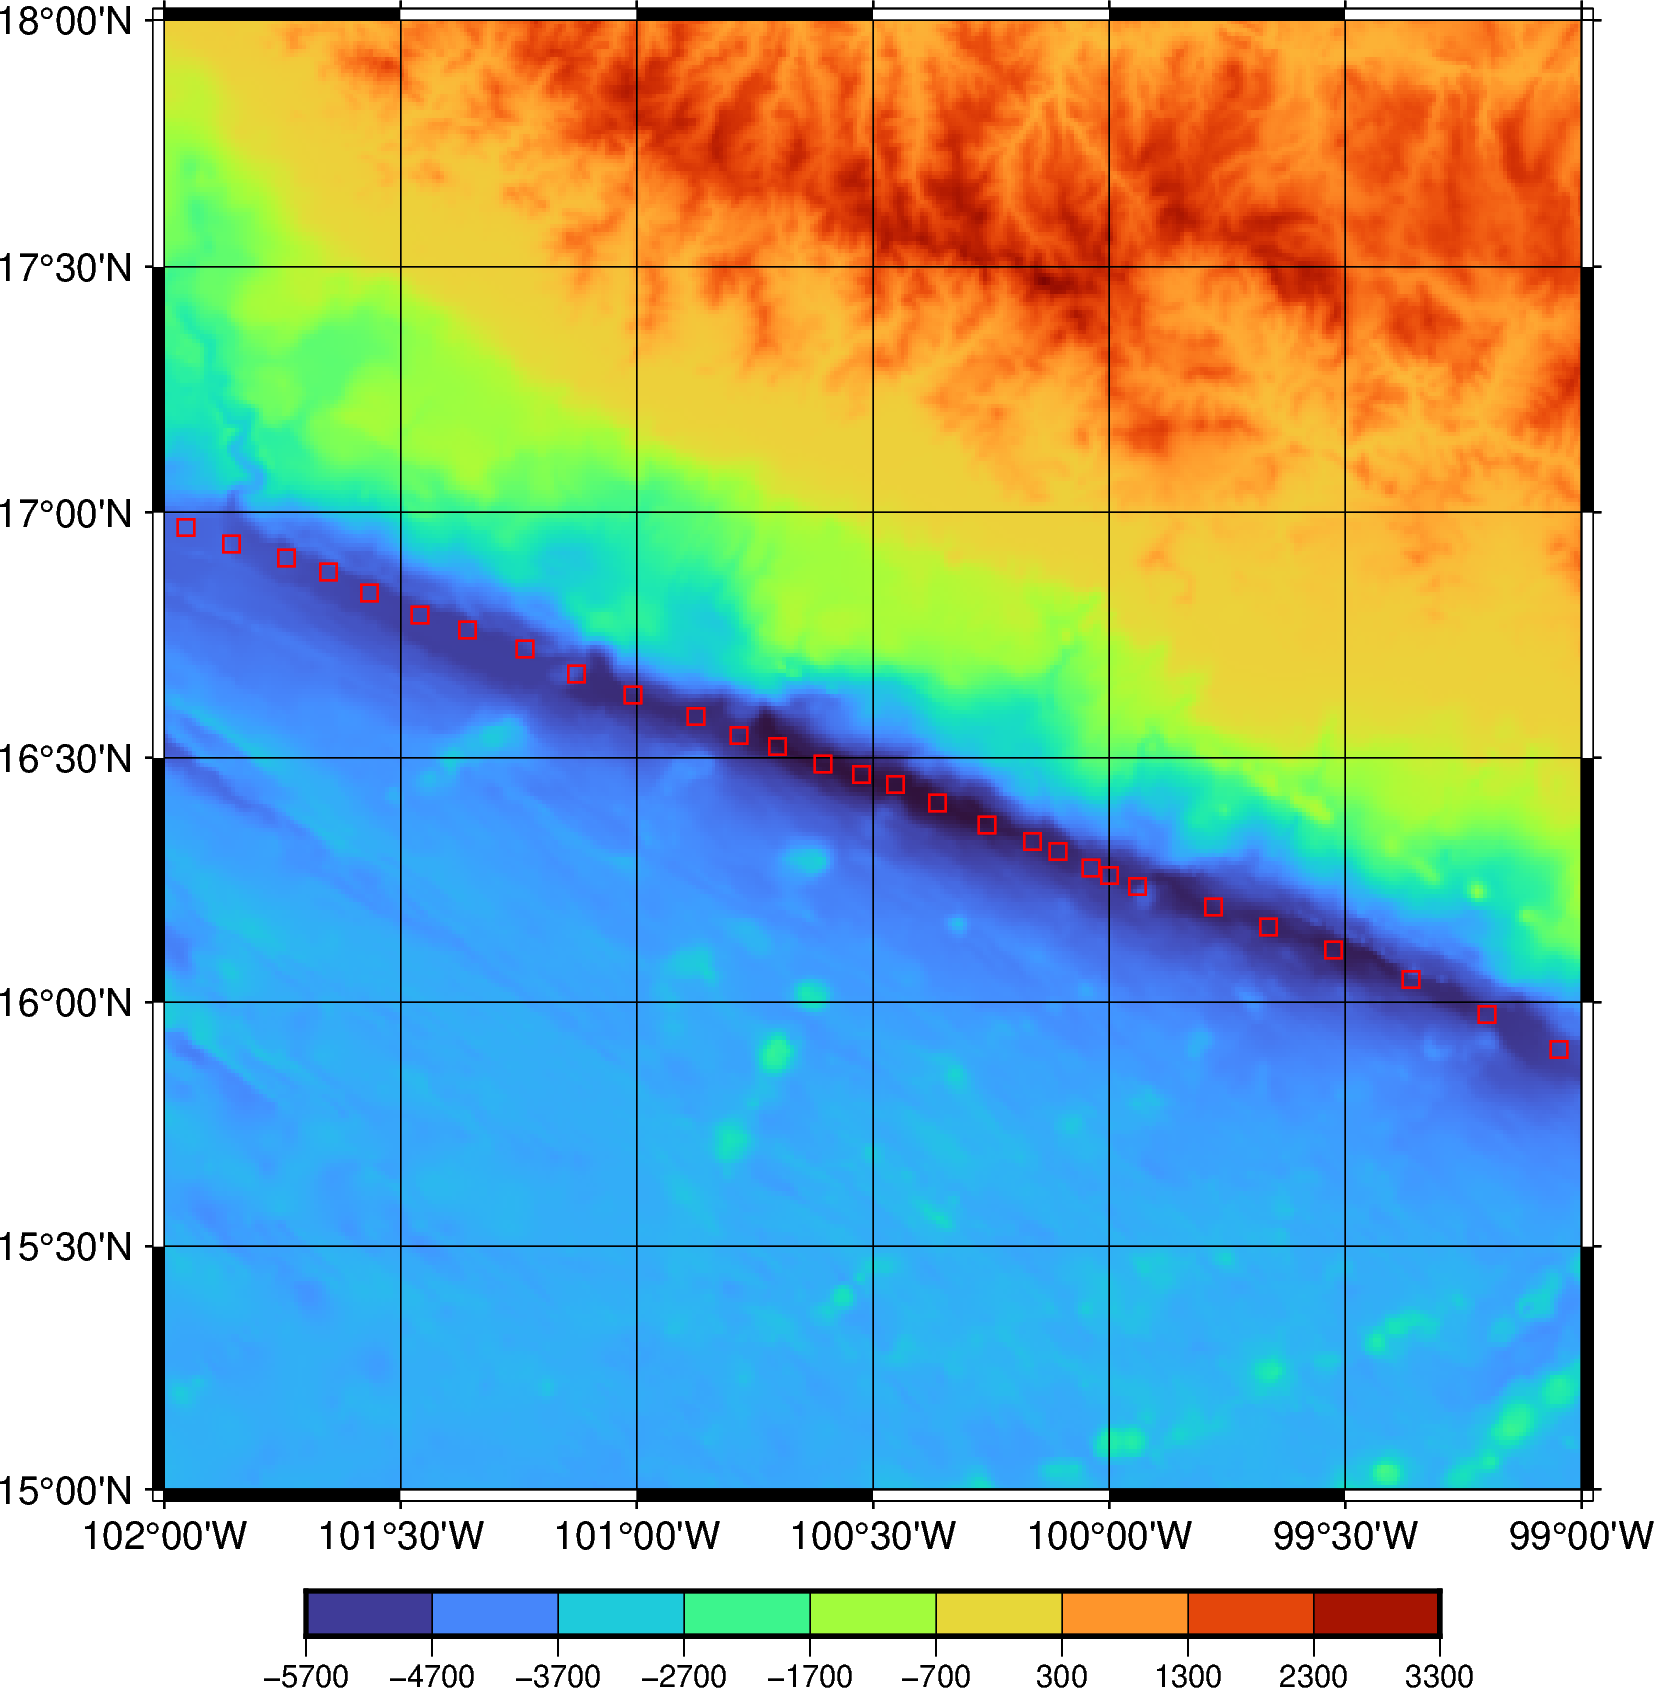

In [10]:
# load the 30 arc-minutes grid with "gridline" registration
elevation = pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

#read shapefile data
#trench = gpd.read_file("./subduction.shp")
trench=gdf["geometry"]
# create a new plot with pygmt.Figure()
fig = pygmt.Figure()

# pass in the grid and set the CPT to "geo"
# set the projection to Mollweide and the size to 10 cm
fig.grdimage(grid=elevation,
             region=reg,
             cmap="turbo",
             projection="M0/0/12c",
             frame="ag"
             )



fig.plot(    data=trench,pen= "0.5p,red",label="trench")

pygmt.makecpt(cmap="turbo", series=[-5700, 3400, 1000])
fig.colorbar()

# show the plot
fig.show()

In [11]:
import scipy as sp

Estaciones=np.zeros((1,3))
Estaciones[0,:2]=Trench[0,:]
Estaciones[0,-1]=(Trench[1,1]-Trench[0,1])/(Trench[1,0]-Trench[0,0])
i=0

DistIntEst=30

while i<len(Trench):
  distancia=0
  flag=0
  while distancia<DistIntEst:
    oldDistance=np.copy(distancia)
    if flag==0:
      distancia+=geopy.distance.geodesic(Estaciones[-1,[1,0]],Trench[i,[1,0]]).km
      flag=1

    elif flag==1 :
      if i==len(Trench)-1:
        break
      distancia+=geopy.distance.geodesic(Trench[i,[1,0]],Trench[i+1,[1,0]]).km
      i+=1
  if i==len(Trench)-1:
        break
  flag=0

  m=(Trench[i,1]-Trench[i-1,1])/(Trench[i,0]-Trench[i-1,0])
  line=lambda x: m*(x-Trench[i-1,0])+Trench[i-1,1]

  def optimizar(x):
    return ( (oldDistance+geopy.distance.geodesic(Trench[i-1,[1,0]], (line(x),x) ).km)-DistIntEst)**2

  Optimizado=sp.optimize.minimize_scalar(optimizar, bounds=np.sort((Trench[i-1,0],Trench[i,0])))

  Estaciones=np.vstack((Estaciones,(Optimizado["x"],line(Optimizado["x"]),m)))


In [12]:
###################El error ocurre cuando acaba de correr
import scipy as sp

Estaciones=np.zeros((1,3))
Estaciones[0,:2]=Trench[0,:]
Estaciones[0,-1]=(Trench[1,1]-Trench[0,1])/(Trench[1,0]-Trench[0,0])
i=0

DistIntEst=5

while i<len(Trench):
  #print(i)
  distancia=0
  flag=0
  oldDistance=0
  while distancia<DistIntEst:
    #print(distancia)
    if flag==1 and (distancia < DistIntEst ) :
      #if i==len(Trench)-1:
      #  break
      #print(i,"Entro")
      oldDistance=np.copy(distancia)
      i+=1
      distancia+=geopy.distance.geodesic(Trench[i,[1,0]],Trench[i+1,[1,0]]).km
      #print(distancia)

      #if (distancia < DistIntEst):


    elif flag==0:
      distancia+=geopy.distance.geodesic(Estaciones[-1,[1,0]],Trench[i+1,[1,0]]).km
      #print(distancia)
      if distancia<DistIntEst:
        flag=1


  #if i==len(Trench)-1:
  #      break



  m=(Trench[i+1,1]-Trench[i,1])/(Trench[i+1,0]-Trench[i,0])
  if m==0 :
    m=0.00001
  #line=lambda x: m*(x-Trench[i-1,0])+Trench[i-1,1]



  if flag==0 and Estaciones[-1,0]!=Trench[i,0]:
    line=lambda x: m*(x-Estaciones[-1,0])+Estaciones[-1,1]
    def optimizar(x):
      return ( (oldDistance+geopy.distance.geodesic(Estaciones[-1,[1,0]], (line(x),x) ).km)-DistIntEst)**2
    Optimizado=sp.optimize.minimize_scalar(optimizar, bounds=np.sort((Estaciones[-1,0],Trench[i+1,0])))

  else :
    line=lambda x: m*(x-Trench[i,0])+Trench[i,1]
    def optimizar(x):
      return ( (oldDistance+geopy.distance.geodesic(Trench[i,[1,0]], (line(x),x) ).km)-DistIntEst)**2
    Optimizado=sp.optimize.minimize_scalar(optimizar, bounds=np.sort((Trench[i,0],Trench[i+1,0] )))

  Estaciones=np.vstack((Estaciones,(Optimizado["x"],line(Optimizado["x"]),m)))
  Estaciones[Estaciones[-1,-1]==0,-1]=0.0001

  #for i in range(len(Estaciones)-1):
  #  print(i,geopy.distance.geodesic(Estaciones[i,[1,0]], (Estaciones[i+1,[1,0]]) ).km)
  #plt.plot()
  #plt.scatter(Estaciones[:,0],Estaciones[:,1])
  #plt.show()

  flag=0

plt.plot()
plt.scatter(Estaciones[:,0],Estaciones[:,1])
plt.show()
print(geopy.distance.geodesic(Estaciones[-1,[1,0]], (Estaciones[-2,[1,0]]) ).km)

IndexError: index 45 is out of bounds for axis 0 with size 45

In [13]:
for i in range(len(Estaciones)-1):
  print(geopy.distance.geodesic(Estaciones[i,[1,0]], (Estaciones[i+1,[1,0]]) ).km)

4.999955894761106
5.000008432986522
4.993651159204591
4.999967031616032
5.000021443726766
4.998284868923444
5.000033113586645
4.999962992571691
4.999987193410967
4.998050323776623
4.999979978152413
4.99600818121241
4.999972619116585
5.000010698250048
4.996866413314933
5.000013428714936
4.988529461208359
5.0000052732957885
4.997628110855425
4.9999812206417085
4.997540541911403
4.999978965927435
5.000045422489764
4.999987383041296
4.999983289058862
4.9942804274603905
4.999953417254826
4.999995256054077
4.994105137056264
4.999974437824207
5.000041821455126
4.999902014402821
4.9999747827712655
5.000038147351345
4.997946389168791
5.000019438777217
4.990700197986249
5.000045005720317
4.997706547885609
5.000017146359551
4.995262447854895
5.000043542526041
4.999982808791264
4.990831990270365
4.999978636409603
4.999779696963414
4.999965846714421
5.000027174138584
4.997858780663806
4.999999072725545
4.999721675497025
4.995492574360873
5.000013541517755
4.997074221031847
4.999917110779062
4.99261

In [14]:
Estaciones.shape

gdEstaciones = gpd.GeoDataFrame(Estaciones,
    geometry = gpd.points_from_xy(Estaciones[:,0], Estaciones[:,1]),
    crs = 'EPSG:4326')

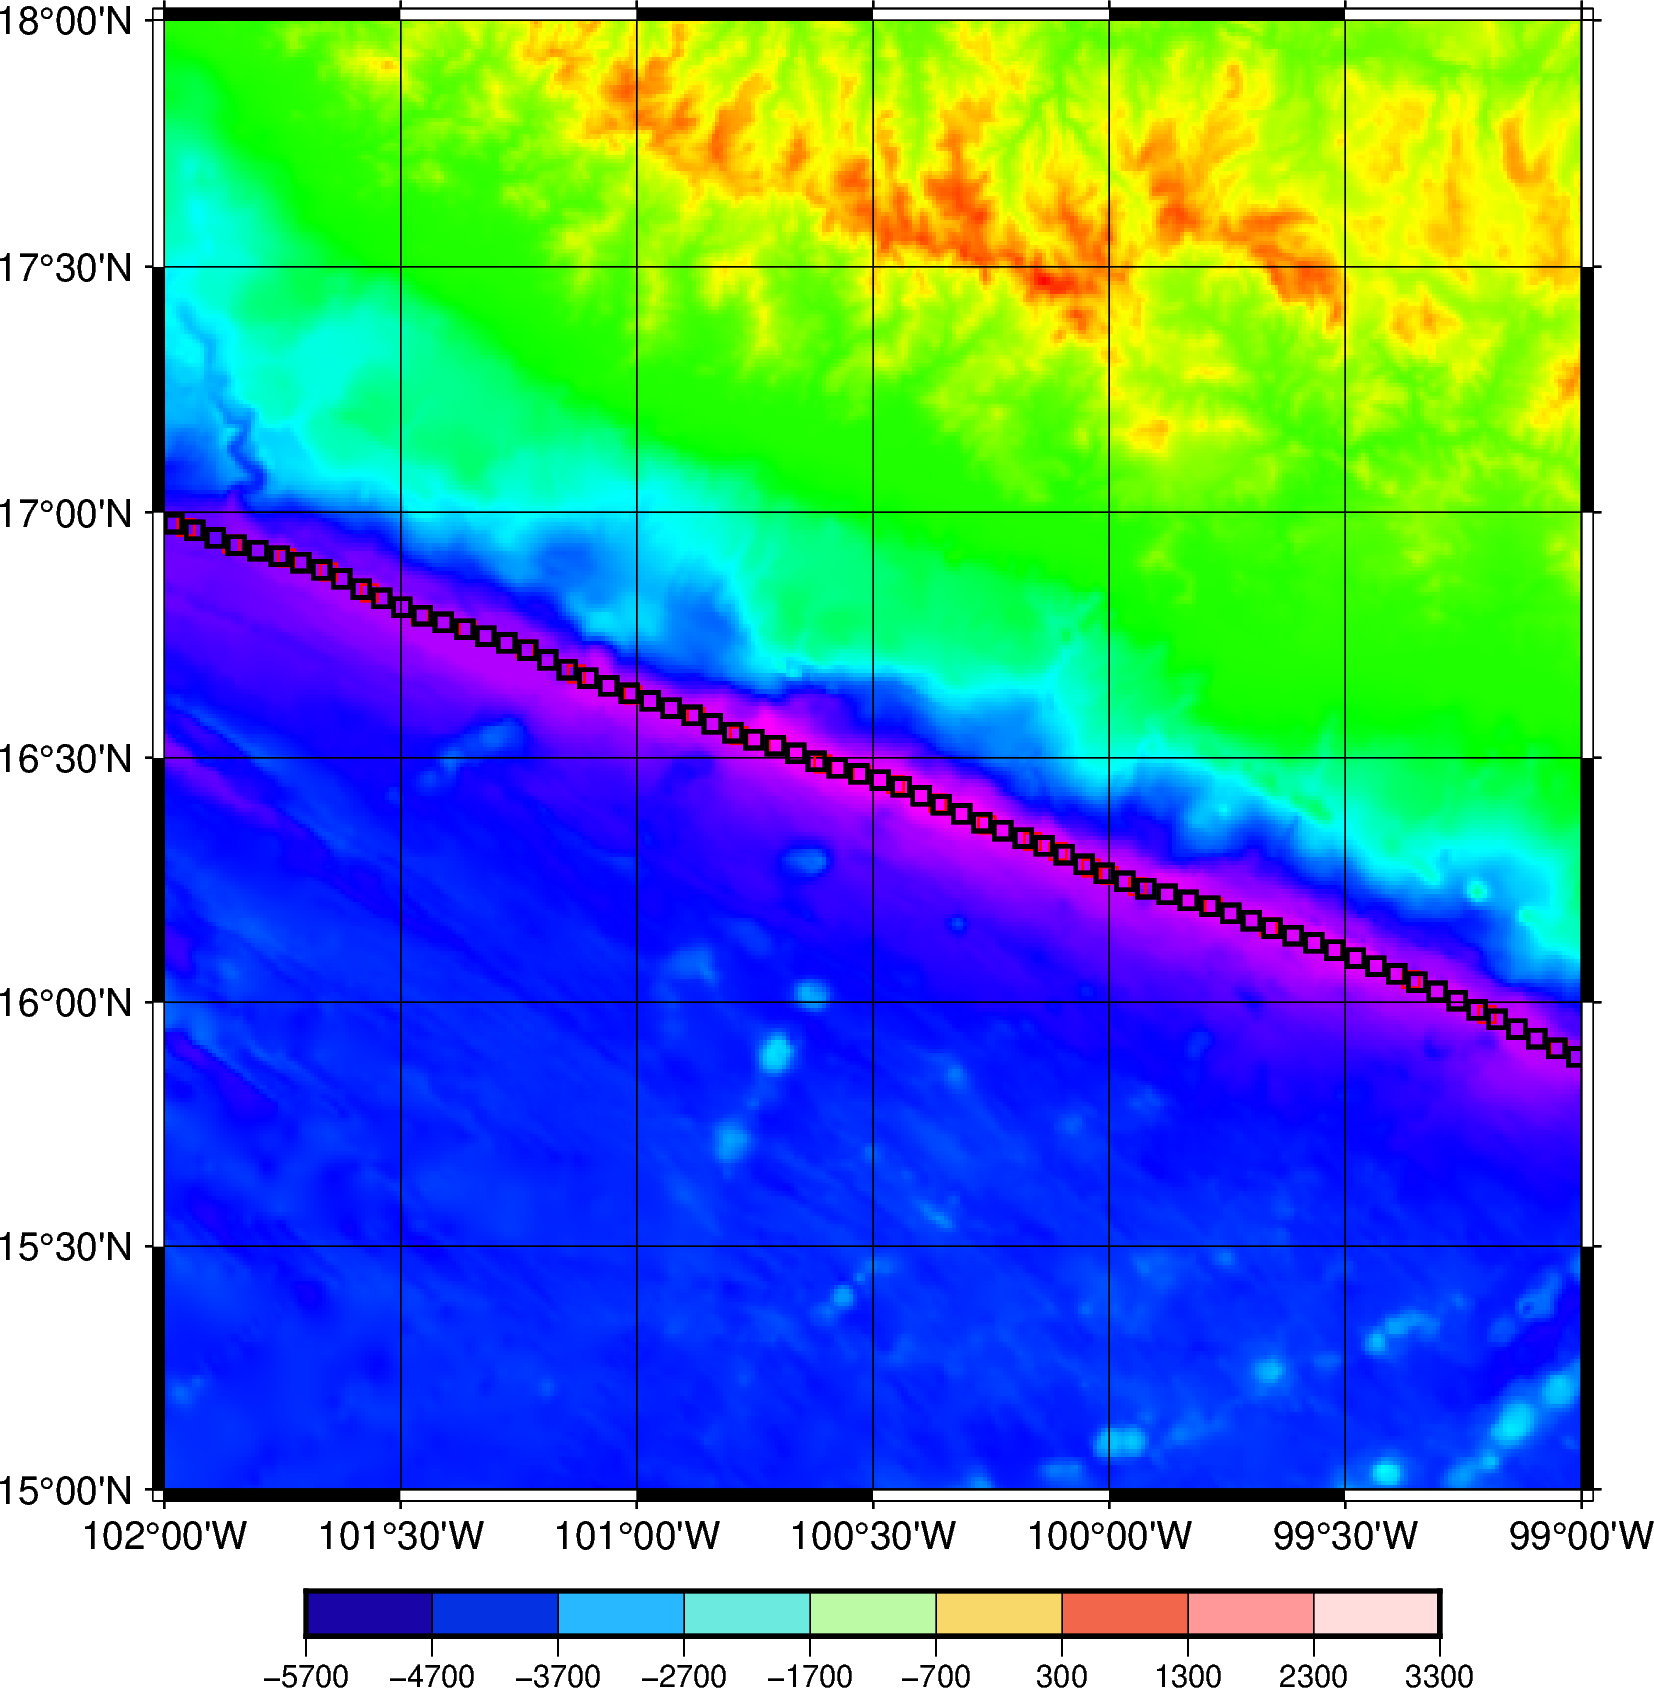

In [15]:
# load the 30 arc-minutes grid with "gridline" registration
elevation = pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

#read shapefile data
#trench = gpd.read_file("./subduction.shp")
Estac=gdEstaciones["geometry"]
# create a new plot with pygmt.Figure()
fig = pygmt.Figure()
# pass in the grid and set the CPT to "geo"
# set the projection to Mollweide and the size to 10 cm
fig.grdimage(grid=elevation,
             region=reg,
             cmap="rainbow",
             projection="M0/0/12c",
             frame="ag"
             )

fig.plot(    data=trench,pen= "0.5p,red",label="trench")
fig.plot(    data=Estac,pen= "1p,black",label="trench")

pygmt.makecpt(cmap="haxby", series=[-5700, 3400, 1000])
fig.colorbar()

# show the plot
fig.show()

In [16]:
Relieve=pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

In [17]:
ConjuntoRectas=np.zeros(0)

j=21
i=0
for j in range(len(Estaciones)):
  print(j/len(Estaciones))
  m=-1/Estaciones[j,-1]

  line=lambda x: m*(x-Estaciones[j,0])+Estaciones[j,1]

  distPuntos=2.0
  DistTotal=200

  Recta=np.reshape(np.array(Estaciones[j,0]),(1,))
  for i in range(int(np.ceil(DistTotal/distPuntos))):

    def optimizar(x):
      if np.abs(line(x))<90 :
        sol=( (geopy.distance.geodesic((line(Recta[-1]),Recta[-1]), (line(x),x) ).km)-distPuntos)**2
      else :
        sol=10000
      return sol

    #Optimizado=sp.optimize.minimize_scalar(optimizar, bounds=np.sort((Recta[-1],Recta[-1]+0.1)), method='bounded')#####Revisar esto
    Optimizado=sp.optimize.minimize(optimizar,x0=Recta[-1]+0.000000001, bounds=[np.sort((Recta[-1],Recta[-1]+0.1))], method="L-BFGS-B")#####Revisar esto

    Recta=np.hstack((Recta, Optimizado["x"]))


  Recta2=np.reshape(np.array(Estaciones[j,0]),(1,))
  for i in range(int(np.ceil(DistTotal/distPuntos))):

    def optimizar(x):
      if np.abs(line(x))<90 :
        sol=( (geopy.distance.geodesic((line(Recta2[-1]),Recta2[-1]), (line(x),x) ).km)-distPuntos)**2
      else :
        sol=10000
      return sol

    #Optimizado=sp.optimize.minimize_scalar(optimizar, bounds=np.sort((Recta2[-1]-0.1,Recta2[-1])), method='bounded')#####Re"visar esto
    Optimizado=sp.optimize.minimize(optimizar,x0=Recta2[-1]-0.000000000001, bounds=[np.sort((Recta2[-1]-0.1,Recta2[-1]))], method="L-BFGS-B")#####Revisar esto
    Recta2=np.hstack((Recta2, Optimizado["x"]))

  RectaFinal=np.hstack((np.flip(Recta2)[:-1],Recta))

  if j==0:
    ConjuntoRectas=RectaFinal
  else :
    ConjuntoRectas=np.vstack((ConjuntoRectas,RectaFinal))







0.0
0.008695652173913044
0.017391304347826087
0.02608695652173913
0.034782608695652174
0.043478260869565216
0.05217391304347826
0.06086956521739131
0.06956521739130435
0.0782608695652174
0.08695652173913043
0.09565217391304348
0.10434782608695652
0.11304347826086956
0.12173913043478261
0.13043478260869565
0.1391304347826087
0.14782608695652175
0.1565217391304348
0.16521739130434782
0.17391304347826086
0.1826086956521739
0.19130434782608696
0.2
0.20869565217391303
0.21739130434782608
0.22608695652173913
0.23478260869565218
0.24347826086956523
0.25217391304347825
0.2608695652173913
0.26956521739130435
0.2782608695652174
0.28695652173913044
0.2956521739130435
0.30434782608695654
0.3130434782608696
0.3217391304347826
0.33043478260869563
0.3391304347826087
0.34782608695652173
0.3565217391304348
0.3652173913043478
0.3739130434782609
0.3826086956521739
0.391304347826087
0.4
0.40869565217391307
0.41739130434782606
0.4260869565217391
0.43478260869565216
0.4434782608695652
0.45217391304347826
0.

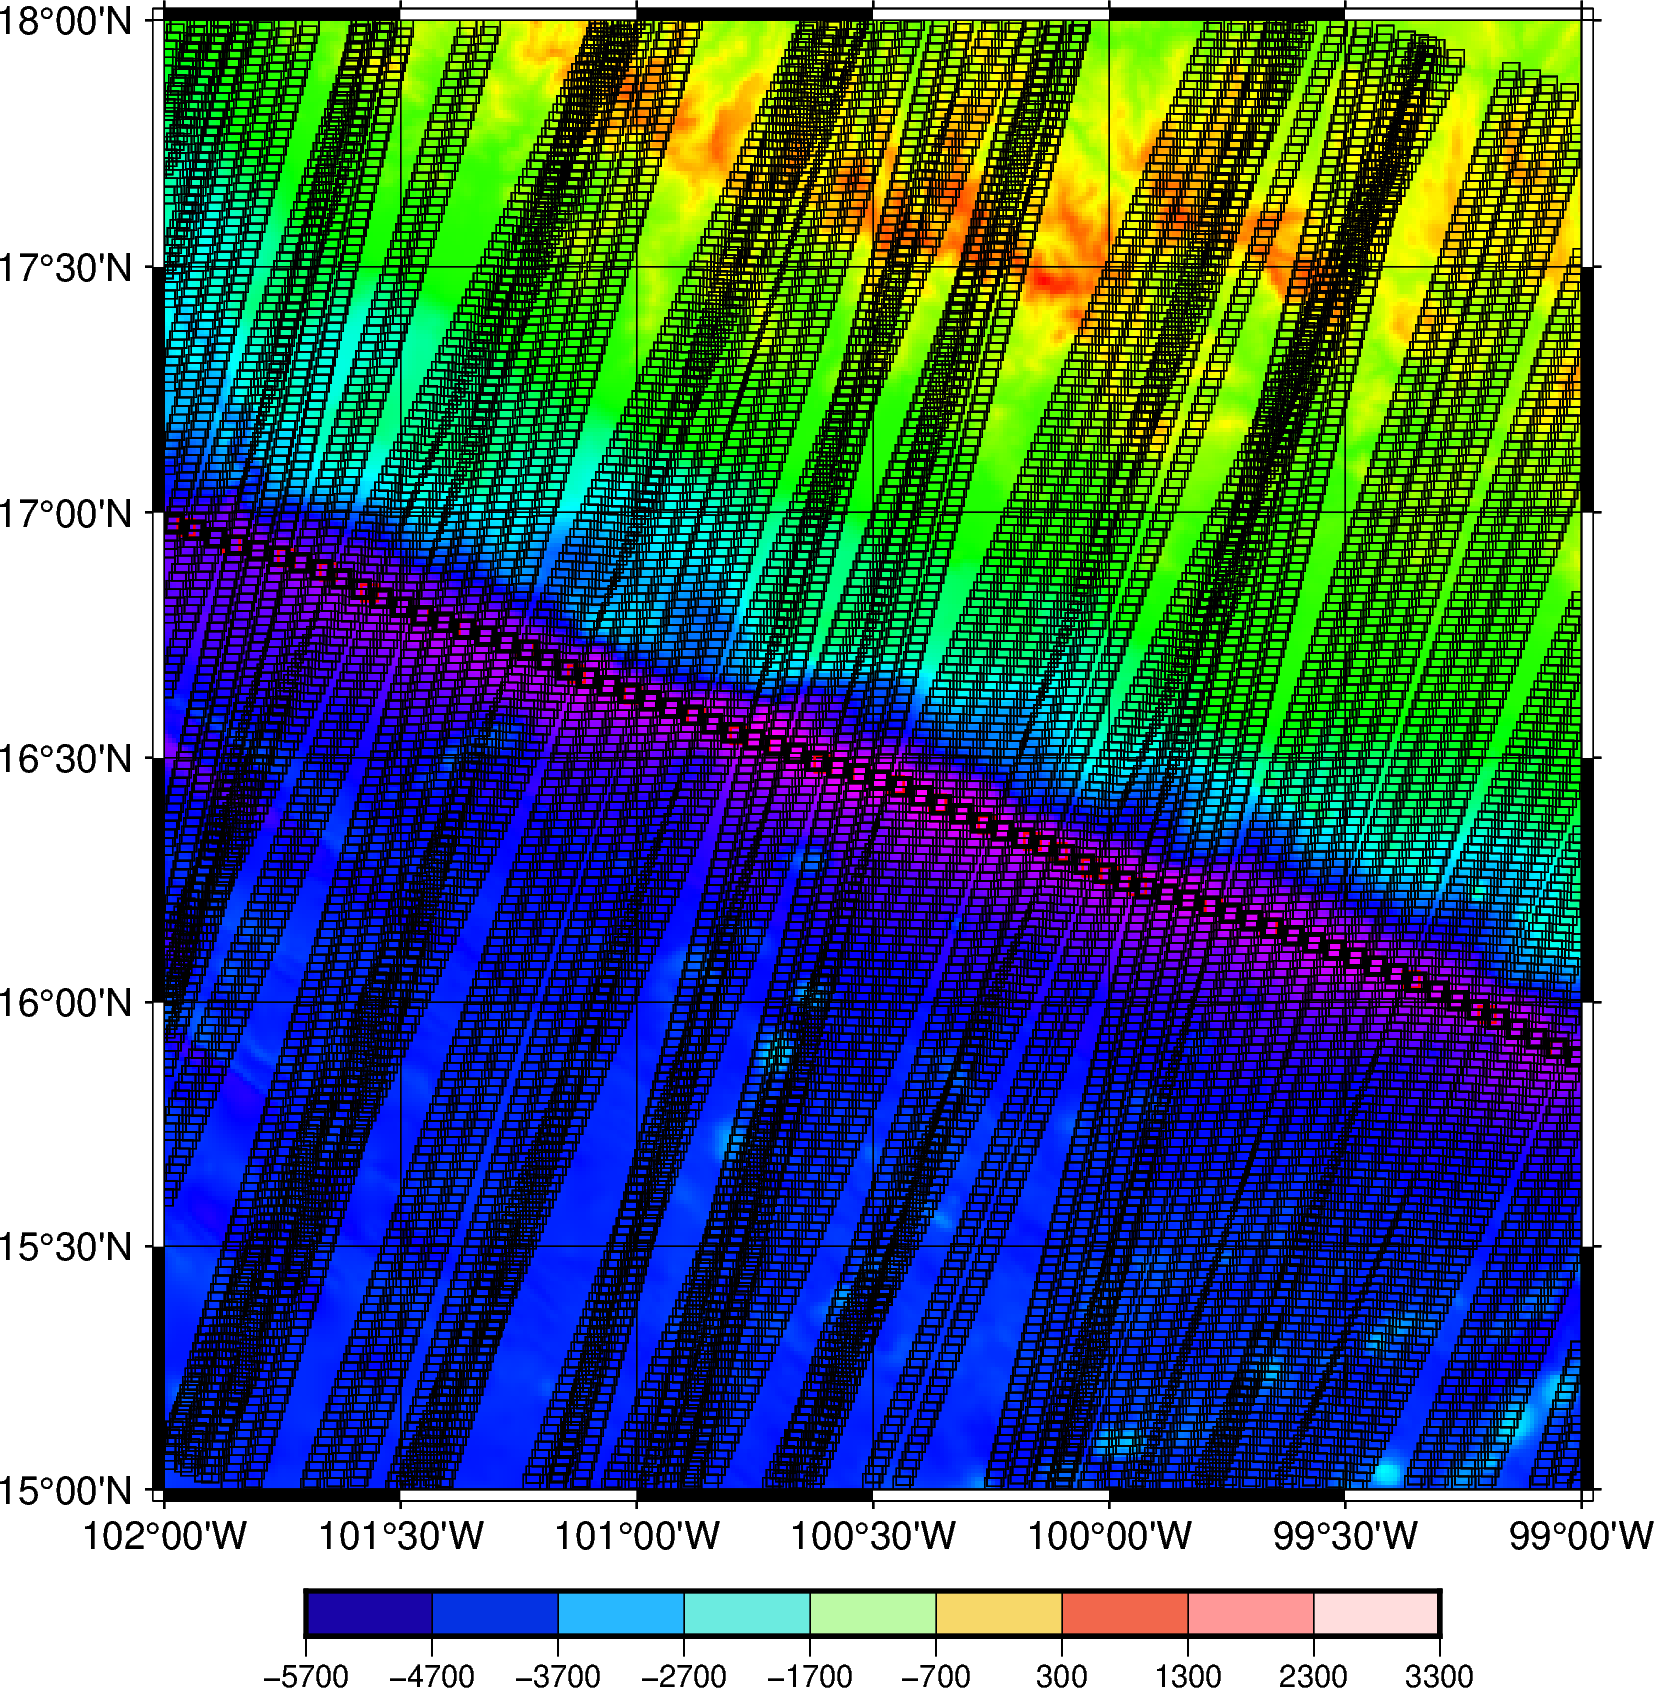

In [18]:
# load the 30 arc-minutes grid with "gridline" registration
elevation = pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

#read shapefile data
#trench = gpd.read_file("./subduction.shp")

# create a new plot with pygmt.Figure()
fig = pygmt.Figure()
# pass in the grid and set the CPT to "geo"
# set the projection to Mollweide and the size to 10 cm
fig.grdimage(grid=elevation,
             region=reg,
             cmap="rainbow",
             projection="M0/0/12c",
             frame="ag"
             )

fig.plot(    data=trench,pen= "0.5p,red",label="trench")
fig.plot(    data=Estac,pen= "1p,black",label="trench")

for j in range(len(Estaciones)):
  m=-1/Estaciones[j,-1]
  line=lambda x: m*(x-Estaciones[j,0])+Estaciones[j,1]

  gdRecta = gpd.GeoDataFrame(
      geometry = gpd.points_from_xy(ConjuntoRectas[j,:], line(ConjuntoRectas[j,:])),
      crs = 'EPSG:4326')

  GrafLine=gdRecta["geometry"]
  fig.plot(    data=GrafLine,pen= "0.01c,black",label="trench")

pygmt.makecpt(cmap="haxby", series=[-5700, 3400, 1000])
fig.colorbar()

# show the plot
fig.show()

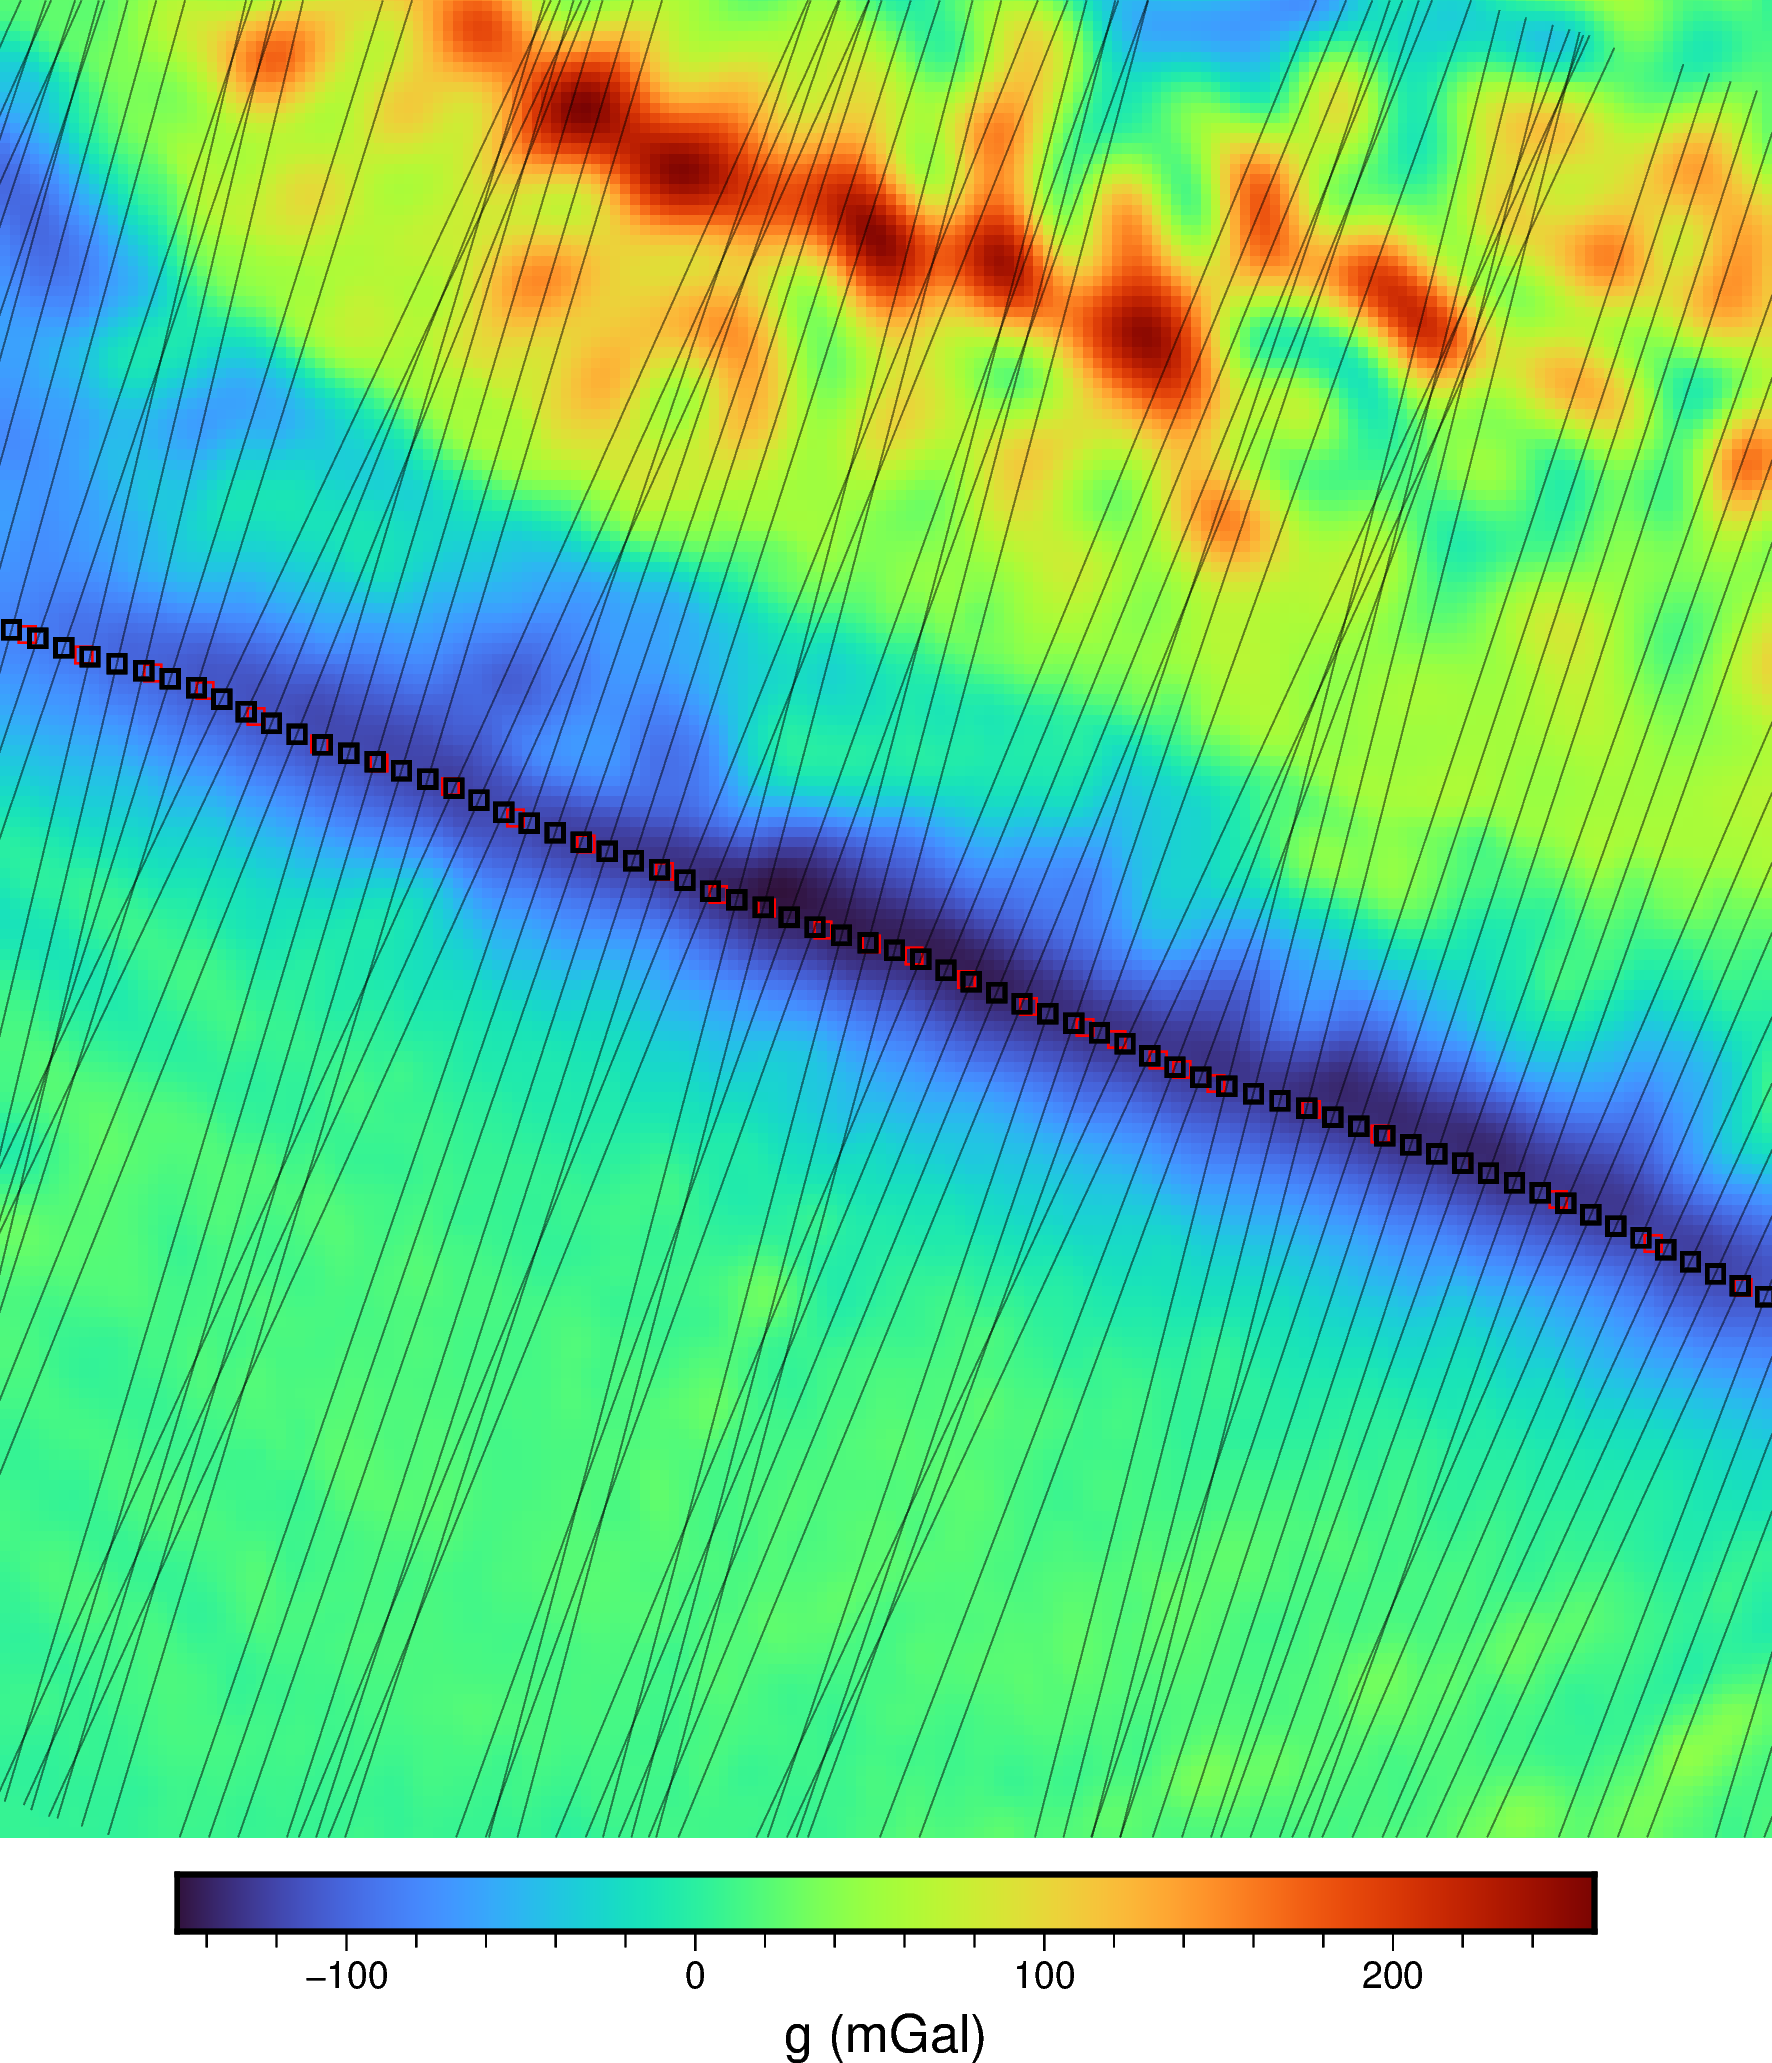

In [19]:
from shapely.geometry import Point, LineString, shape

# load the 30 arc-minutes grid with "gridline" registration
elevation = pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

#read shapefile data
#trench = gpd.read_file("./subduction.shp")

# create a new plot with pygmt.Figure()
fig = pygmt.Figure()
# pass in the grid and set the CPT to "geo"
# set the projection to Mollweide and the size to 10 cm

fig.grdimage("/content/grav_DB.tiff",
    region=reg,
    projection=proj,
    cmap="turbo"
    )
#fig.grdimage(grid=elevation,
#             region=reg,
#             cmap="turbo",
#             projection="M0/0/12c",
#             frame="ag"
#             )

fig.plot(    data=trench,pen= "0.5p,red",label="trench")
fig.plot(    data=Estac,pen= "1p,black",label="trench")

for j in range(len(Estaciones)):
  m=-1/Estaciones[j,-1]
  line=lambda x: m*(x-Estaciones[j,0])+Estaciones[j,1]

  gdRecta = gpd.GeoDataFrame(
      geometry = gpd.points_from_xy(ConjuntoRectas[j,:], line(ConjuntoRectas[j,:])),
      crs = 'EPSG:4326')

  GrafLine=gdRecta["geometry"]
  GrafLine=gdRecta.apply(lambda x: LineString(x.tolist()))
  fig.plot(    data=GrafLine,pen= "0.01c,black",label="trench",transparency=50)


#pygmt.makecpt(cmap="turbo", series=[-5700, 3400, 1000])
#pygmt.makecpt(cmap="turbo", series=[-5700, 3400, 1000])
#fig.colorbar()
#fig.colorbar(frame=["x+lElevation(m)"])
fig.colorbar(frame=["x+lg (mGal)"])
# show the plot
fig.show()

In [20]:
Mapa=np.ones(3)

Perfil=np.ones(ConjuntoRectas.shape)
Perfil.shape

i
j=0

for j in range(ConjuntoRectas.shape[0]):
  print(j/(ConjuntoRectas.shape[0]))
  m=-1/Estaciones[j,-1]
  line=lambda x: m*(x-Estaciones[j,0])+Estaciones[j,1]


  for i in range(ConjuntoRectas.shape[1]):
    if m>0:
      Perfil[j,i]=Relieve.interp(lon=ConjuntoRectas[j,i],lat=line(ConjuntoRectas[j,i]))
      Mapa=np.vstack((Mapa,(ConjuntoRectas[j,i],line(ConjuntoRectas[j,i]), Perfil[j,i])))

    else :
      Perfil[j,(ConjuntoRectas.shape[1]-1)-i]=Relieve.interp(lon=ConjuntoRectas[j,i],lat=line(ConjuntoRectas[j,i]))
      Mapa=np.vstack((Mapa,(ConjuntoRectas[j,i],line(ConjuntoRectas[j,i]), Perfil[j,(ConjuntoRectas.shape[1]-1)-i])))

Mapa=Mapa[1:]

Mapa.shape[0]/Perfil.shape[1]

0.0
0.008695652173913044
0.017391304347826087
0.02608695652173913
0.034782608695652174
0.043478260869565216
0.05217391304347826
0.06086956521739131
0.06956521739130435
0.0782608695652174
0.08695652173913043
0.09565217391304348
0.10434782608695652
0.11304347826086956
0.12173913043478261
0.13043478260869565
0.1391304347826087
0.14782608695652175
0.1565217391304348
0.16521739130434782
0.17391304347826086
0.1826086956521739
0.19130434782608696
0.2
0.20869565217391303
0.21739130434782608
0.22608695652173913
0.23478260869565218
0.24347826086956523
0.25217391304347825
0.2608695652173913
0.26956521739130435
0.2782608695652174
0.28695652173913044
0.2956521739130435
0.30434782608695654
0.3130434782608696
0.3217391304347826
0.33043478260869563
0.3391304347826087
0.34782608695652173
0.3565217391304348
0.3652173913043478
0.3739130434782609
0.3826086956521739
0.391304347826087
0.4
0.40869565217391307
0.41739130434782606
0.4260869565217391
0.43478260869565216
0.4434782608695652
0.45217391304347826
0.

115.0

Text(0, 0.5, 'Elevation [m]')

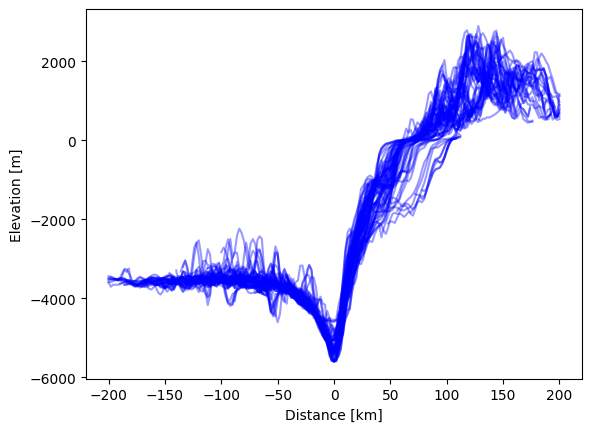

In [21]:
for i in range(ConjuntoRectas.shape[0]):
  plt.plot(np.arange(-DistTotal,DistTotal+distPuntos,2),Perfil[i,:], color="blue",alpha=0.4)

plt.plot(np.arange(-DistTotal,DistTotal+distPuntos,2),np.apply_along_axis(np.median,0,Perfil),color="red")
plt.plot(np.arange(-DistTotal,DistTotal+distPuntos,2),np.apply_along_axis(np.mean,0,Perfil),color="green")
plt.xlabel("Distance [km]")#,fontsize=10)
plt.ylabel("Elevation [m]")#,fontsize=10)


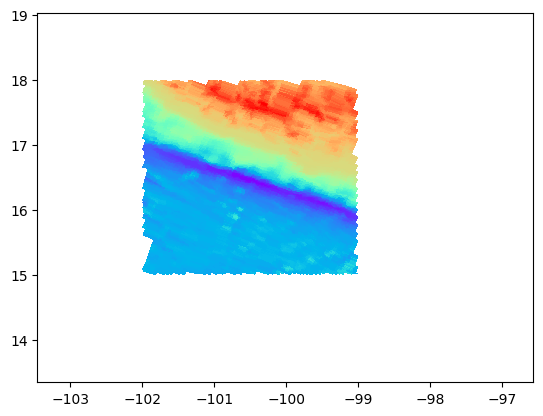

In [26]:
plt.scatter(Mapa[:,0], Mapa[:,1], c=Mapa[:,2], cmap="rainbow")
plt.tripcolor(Mapa[:,0], Mapa[:,1], (Mapa)[:,2], cmap="rainbow")
plt.tricontourf(Mapa[:,0], Mapa[:,1], (Mapa)[:,2], cmap="rainbow")


In [ ]:
#plt.scatter(Mapa[:,0], Mapa[:,1], c=Mapa[:,2])
Mediana=np.apply_along_axis(np.median,0,Perfil)
#plt.plot(Mediana)
Mediana.shape

Mapa.shape

Mapa2=np.copy(Mapa)



for j in np.arange(len(Estaciones))[Estaciones[:,-1]>0]:
  Mapa2[np.flip(np.arange(ConjuntoRectas.shape[1]*j,ConjuntoRectas.shape[1]*(j+1))),:]=Mapa2[(np.arange(ConjuntoRectas.shape[1]*j,ConjuntoRectas.shape[1]*(j+1))),:]
  Mapa[np.flip(np.arange(ConjuntoRectas.shape[1]*j,ConjuntoRectas.shape[1]*(j+1))),:]=Mapa[(np.arange(ConjuntoRectas.shape[1]*j,ConjuntoRectas.shape[1]*(j+1))),:]

for i in range(len(Mediana)-1):
  Mapa2[:,2][i::int(len(Mapa2)/len(Estaciones))]=Mediana[i]


plt.scatter(Mapa2[:,0], Mapa2[:,1], c=Mapa2[:,2], cmap="rainbow")
plt.colorbar()

#plt.scatter(Mapa[:,0], Mapa[:,1], c=Mapa[:,2])




In [ ]:
np.savetxt("./PuntosOrtogonales.csv", Mapa, delimiter=",")
Perfil.shape

In [ ]:
#plt.tripcolor(Mapa2[:,0], Mapa2[:,1], (Mapa2)[:,2], cmap="rainbow")
plt.tripcolor(Mapa2[:,0], Mapa2[:,1], (Mapa-Mapa2)[:,2], cmap="rainbow")
plt.colorbar()

#plt.plot(Estaciones[:,0], Estaciones[:,1])

In [ ]:
plt.scatter(Mapa2[:,0], Mapa2[:,1], c=(Mapa-Mapa2)[:,2], cmap="rainbow")

plt.tricontourf(Mapa2[:,0], Mapa2[:,1], (Mapa-Mapa2)[:,2], cmap="rainbow")
plt.tripcolor(Mapa2[:,0], Mapa2[:,1], (Mapa-Mapa2)[:,2], cmap="rainbow")
plt.colorbar()



In [ ]:
pygmt.datasets.load_earth_relief("30s", registration="pixel", region=reg)

gdEstaciones = gpd.GeoDataFrame(Estaciones,
    geometry = gpd.points_from_xy(Estaciones[:,0], Estaciones[:,1]),
    crs = 'EPSG:4326')